# Práctica 1 Validación simple y cruzada y Naive-Bayes
## Validación cruzada y simple
En esta práctica se han implementado dos estrategias de validación:

* Validación simple: el conjunto de datos se divide en dos subconjuntos, entrenamiento y test según un porcentaje configurable. Se realiza un shuffle previo a los datos para evitar sesgos en las particiones.

In [1]:
import numpy as np
from datos import Datos
from estrategiasparticionado.validacion_simple import ValidacionSimple
dataset=Datos('./conjunto_datos/tic-tac-toe.data')
dataset2=Datos('./conjunto_datos/german.data')

validacionSimple = ValidacionSimple()
validacionSimple.porcentajeEntrenamiento = 0.7 # Valor por defecto
validacionSimple.creaParticiones(dataset.datos)
for k, particion in enumerate(validacionSimple.particiones):
    print('Partición', k+1)
    print('Entrenamiento: ', particion.indicesTrain[:15], '...')
    print('Validación', particion.indicesTest[:15], '...')

Partición 1
Entrenamiento:  [830 127 836 744 377 128 543 847 150  18 459 306 869  32 931] ...
Validación [400  41 232 731 145  85  68 480 646 242  73 539 812 917 382] ...


* Validación cruzada: se crean K-folds, esto es K particiones de los datos para entrenamiento y test. Cada partición j tendrá a la j-ésima partición como test y el resto para entrenamiento.

In [2]:
from estrategiasparticionado.validacion_cruzada import ValidacionCruzada

validacionCruzada = ValidacionCruzada()
validacionCruzada.nfolds = 10 # Valor por defecto
validacionCruzada.creaParticiones(dataset.datos)
for k, particion in enumerate(validacionCruzada.particiones):
    print('Partición', k+1)
    print('Entrenamiento: ', particion.indicesTrain[:15], '...')
    print('Validación', particion.indicesTest[:15], '...')


Partición 1
Entrenamiento:  [661 106 861 134 848 143 719 545 196 313   7 138 617 672  81] ...
Validación [175 105 466 549  25 279 933 404 877 314  71 177 178 357 384] ...
Partición 2
Entrenamiento:  [175 105 466 549  25 279 933 404 877 314  71 177 178 357 384] ...
Validación [661 106 861 134 848 143 719 545 196 313   7 138 617 672  81] ...
Partición 3
Entrenamiento:  [175 105 466 549  25 279 933 404 877 314  71 177 178 357 384] ...
Validación [667 458  55 540 150 654 153 523 536 821 123 231 749 181  85] ...
Partición 4
Entrenamiento:  [175 105 466 549  25 279 933 404 877 314  71 177 178 357 384] ...
Validación [716 875 619 696 623 399 625 249 350 318  32 755 114 663 375] ...
Partición 5
Entrenamiento:  [175 105 466 549  25 279 933 404 877 314  71 177 178 357 384] ...
Validación [308  88 794 293 388 420 121 765 333 477 264 913 548 410 615] ...
Partición 6
Entrenamiento:  [175 105 466 549  25 279 933 404 877 314  71 177 178 357 384] ...
Validación [579 924 307 681 930 565 853 524 259 851

## Apartado 1: Naive-Bayes
A continuación se muestra para cada uno de los datasets los errores de predicción con o sin la corrección de Laplace
### tic-tac-toe validación simple sin Laplace

In [3]:
from clasificadores.clasificador_naive_bayes import ClasificadorNaiveBayes
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 0.0
clasificador.validacion(validacionSimple, dataset)
print('Error:', clasificador.errores)
error_tic = clasificador.errores[0]

Error: [0.2791044776119403]


### tic-tac-toe validación simple con Laplace

In [4]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 1.0
clasificador.validacion(validacionSimple, dataset)
print('Error:', clasificador.errores)
error_tic_laplace = clasificador.errores[0]

Error: [0.28507462686567164]


### tic-tac-toe validación cruzada sin Laplace

In [5]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 0.0
clasificador.validacion(validacionCruzada, dataset)
print('Errores:', clasificador.errores)
print('Error: %.4f +- %.4f' % (np.mean(clasificador.errores), 2*np.std(clasificador.errores)))
error_tic_cruzada = np.mean(clasificador.errores)

Errores: [0.29466357308584684, 0.3062645011600928, 0.308584686774942, 0.29582366589327147, 0.2842227378190255, 0.29582366589327147, 0.2865429234338747, 0.2877030162412993, 0.2931633835457706, 0.2931633835457706]
Error: 0.2946 +- 0.0150


### tic-tac-toe validación cruzada con Laplace

In [6]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 1.0
clasificador.validacion(validacionCruzada, dataset)
print('Errores:', clasificador.errores)
print('Error: %.4f +- %.4f' % (np.mean(clasificador.errores), 2*np.std(clasificador.errores)))
error_tic_cruzada_laplace = np.mean(clasificador.errores)

Errores: [0.2691415313225058, 0.2865429234338747, 0.29698375870069604, 0.3051044083526682, 0.2865429234338747, 0.27958236658932717, 0.2853828306264501, 0.29118329466357307, 0.2862108922363847, 0.2862108922363847]
Error: 0.2873 +- 0.0181


### german validacion simple sin Laplace

In [7]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 0.0
clasificador.validacion(validacionSimple, dataset2)
print('Error:', clasificador.errores)
error_german = clasificador.errores[0]

Error: [0.24142857142857144]


### german validacion simple con Laplace

In [8]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 1.0
clasificador.validacion(validacionSimple, dataset2)
print('Error:', clasificador.errores)
error_german_laplace = clasificador.errores[0]

Error: [0.2357142857142857]


### german validacion cruzada sin Laplace

In [9]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 0.0
clasificador.validacion(validacionCruzada, dataset2)
print('Errores:', clasificador.errores)
print('Error: %.4f +- %.4f' % (np.mean(clasificador.errores), 2*np.std(clasificador.errores)))
error_german_cruzada = np.mean(clasificador.errores)

Errores: [0.24333333333333335, 0.23666666666666666, 0.24, 0.23666666666666666, 0.2477777777777778, 0.24222222222222223, 0.23777777777777778, 0.23555555555555555, 0.23666666666666666, 0.22111111111111112]
Error: 0.2378 +- 0.0133


### german validacion cruzada con Laplace

In [10]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 1.0
clasificador.validacion(validacionCruzada, dataset2)
print('Errores:', clasificador.errores)
print('Error: %.4f +- %.4f' % (np.mean(clasificador.errores), 2*np.std(clasificador.errores)))
error_german_cruzada_laplace = np.mean(clasificador.errores)

Errores: [0.23, 0.23333333333333334, 0.24444444444444444, 0.23333333333333334, 0.24222222222222223, 0.23444444444444446, 0.23444444444444446, 0.24222222222222223, 0.24555555555555555, 0.2311111111111111]
Error: 0.2371 +- 0.0111


### Apartado 2 Análisis
Los resultados obtenidos son satisfactorios con errores entre el 20% y el 30% dependiendo del dataset. En concreto, en el dataset de *tic-tac-toe* la corrección de Laplace aporta un valor añadido ya que hay muchas particiones en las que faltan datos de una clase y esto provoca una predicción erronea. En el dataset de *german*, por otro lado, solo parece aportar ruído ya que esto no parece afectar a la predicción.

En general se ve que la validación cruzada obtiene un error medio menor, ya que dentro de la muestra se ven valores a veces muy bajos o a veces muy altos. (stddev = 5%)

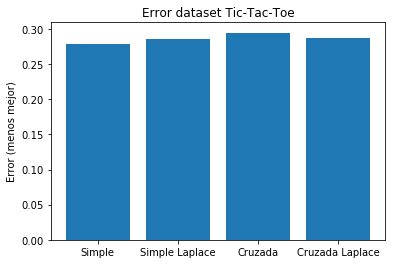

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
ind = [error_tic, error_tic_laplace, error_tic_cruzada, error_tic_cruzada_laplace]
fig, ax = plt.subplots()
plt.bar(range(4), ind)
ax.set_xticks(range(4))
ax.set_xticklabels(['Simple', 'Simple Laplace', 'Cruzada', 'Cruzada Laplace'])
ax.set_ylabel('Error (menos mejor)')
ax.set_title('Error dataset Tic-Tac-Toe')

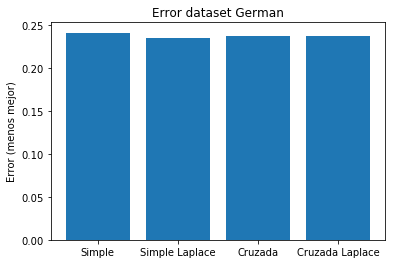

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
ind = [error_german, error_german_laplace, error_german_cruzada, error_german_cruzada_laplace]
fig, ax = plt.subplots()
plt.bar(range(4), ind)
ax.set_xticks(range(4))
ax.set_xticklabels(['Simple', 'Simple Laplace', 'Cruzada', 'Cruzada Laplace'])
ax.set_ylabel('Error (menos mejor)')
ax.set_title('Error dataset German')

### Apartado 3 Scikit

In [13]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit

import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Caso tic-tac-toe
#### Codificación de los atributos

In [14]:
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
X = encAtributos.fit_transform(dataset.datos[:,:-1])
Y = dataset.datos[:,-1] 
class_names = sorted(dataset.diccionarios[-1].keys())
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#### Modelo
Utilizamos un modelo multinomial ya que todos los atributos son nominales (discretos).

In [15]:
# Clasificador
laplace_smoothing = 0.0
model = MultinomialNB()
if laplace_smoothing != 0:
    model.alpha = laplace_smoothing

#### Clasificación

In [16]:
# Validacion simple
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("Validación simple. Error: %0.2f" % (1-score))
cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))

# Validacion cruzada
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, Y, cv=cv)
print("Validación cruzada. Error: %0.2f (+/- %0.2f)" % (1-scores.mean(), scores.std() * 2))

Validación simple. Error: 0.32
Validación cruzada. Error: 0.30 (+/- 0.04)


Confusion matrix, without normalization
[[ 43  57]
 [ 34 154]]
Normalized confusion matrix
[[ 0.43        0.57      ]
 [ 0.18085106  0.81914894]]


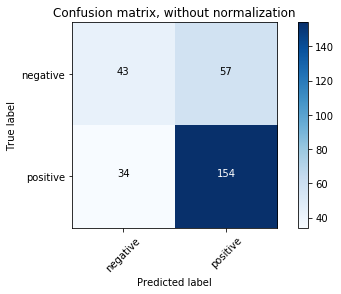

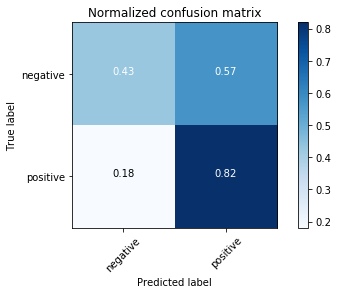

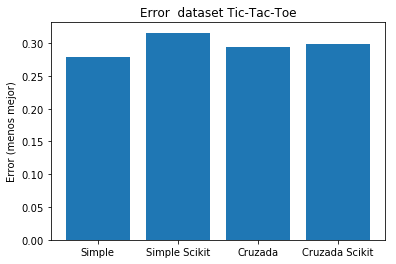

In [17]:
# Mostrar matrices de confusion
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.figure()
ind = [error_tic, 1-score, error_tic_cruzada, 1-scores.mean()]
fig, ax = plt.subplots()
plt.bar(range(4), ind)
ax.set_xticks(range(4))
ax.set_xticklabels(['Simple', 'Simple Scikit', 'Cruzada', 'Cruzada Scikit'])
ax.set_ylabel('Error (menos mejor)')
ax.set_title('Error  dataset Tic-Tac-Toe')

plt.show()

Se observa que en particular, clasificamos bastante mal los negativos, teniendo un error en torno al 57% (es decir, una probabilidad de dar un falso positivo muy alta). Esto aún así puede ser bueno si logramos minimizar la probabilidad de un falso negativo (18%) que puede ser muy interesante en campos como el diagnóstico de enfermedades o el control de calidad.
### Caso german
En este caso, utilizamos un clasificador NB Gaussiano, que asumirá que todos los atributos son atributos continuos de distribución normal, luego cometeremos un error alto.

Validación simple. Error: 0.31
Validación cruzada. Error: 0.28 (+/- 0.05)
Confusion matrix, without normalization
[[160  54]
 [ 38  48]]
Normalized confusion matrix
[[ 0.74766355  0.25233645]
 [ 0.44186047  0.55813953]]


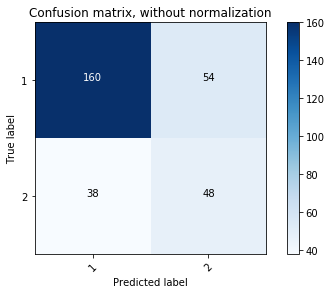

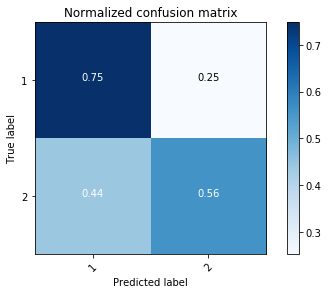

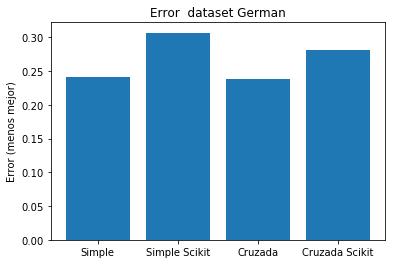

In [18]:
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset2.nominalAtributos[:-1],sparse=False)
X = encAtributos.fit_transform(dataset2.datos[:,:-1])
Y = dataset2.datos[:,-1] 
class_names = sorted(dataset2.diccionarios[-1].keys())
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Clasificador
laplace_smoothing = 0
model = GaussianNB()
if laplace_smoothing != 0:
    model.alpha = laplace_smoothing
    
# Validacion simple
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("Validación simple. Error: %0.2f" % (1-score))
cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))

# Validacion cruzada
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, Y, cv=cv)
print("Validación cruzada. Error: %0.2f (+/- %0.2f)" % (1-scores.mean(), scores.std() * 2))

# Mostrar matrices de confusion
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.figure()
ind = [error_german, 1-score, error_german_cruzada, 1-scores.mean()]
fig, ax = plt.subplots()
plt.bar(range(4), ind)
ax.set_xticks(range(4))
ax.set_xticklabels(['Simple', 'Simple Scikit', 'Cruzada', 'Cruzada Scikit'])
ax.set_ylabel('Error (menos mejor)')
ax.set_title('Error  dataset German')

plt.show()

Como se ha mencionado antes, el error es considerablemente alto al nuestro ya que este Dataset contiene datos discretos y continuos y los clasificadores que usamos (Multinomial o Gaussian) asumen que o bien son discretos los datos o bien son continuos.

Se observa como antes que se predice muy bien una de las dos clases, mientras que la otra tiene un error en torno al 50% (seguramente esta segunda clase dependa de dar una mejor estimación a los atributos nominales).

No se incluyen por brevedad los resultados obtenidos con la corrección de Laplace pero son análogos a los obtenidos y la mejora es imperceptible o inexistente.

## Apartado 4 Comentarios sobre la validación cruzada
En sí la validación cruzada nos permite dividir un conjunto de datos en K particiones para la clasificación, sin embargo, esto puede no ser tan estable según el dataset.

El ejemplo más claro de este fenómeno viene dado por el ordenamiento de los datos, esto lo que genera es que al estar ordenados los datos, al hacer la división en cada uno de los K-folds, resulte en que los datos de cada K-fold se parecen mucho entre sí y en general poco a los de entrenamiento, lo que genera un error mucho más alto del real. Para ello, se propone como solución (implementada también en nuestras implementaciones), un shuffle previo de los indices antes de realizar la validación cruzada o simple para así maximizar la distancia entre datos contiguos.

Por otro lado, la validación cruzada devuelve K errores en vez de uno sólo, lo que puede generar interpretaciones erróneas de este valor ya que coger el mínimo o la media si hay mucha dispersión, puede resultar en dar una estimación poco real del error.

Además en el caso de modelos hiperparamétricos, donde previo a entrenamiento, se debe estimar un parámetro (el único caso aquí es la corrección de Laplace y no se cumple esto), puede generar fallos ya que la estimación y optimización del hiperparámetro estará realizada teniendo en cuenta todos los datos y no restringiéndose al conjunto de entrenamiento.

De manera empírica, se añade que el valor de la validación cruzada viene dado solo por el obtener un valor de desviación típica del error, ya que la media del error es similar a la dada por validación simple. Nótese que esto es algo particular del dataset y del clasificador, pero en este caso, no aporta un valor añadido.